<a href="https://colab.research.google.com/github/zkibnksmh/MachineLearningTasks/blob/main/UASML/Exercise_04_Pytorch_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Zaky Ibnu Kusumah
#1103204213
#TK4404

## **04. PyTorch Custom Datasets**

# Preventing Underfitting in Machine Learning Models: A Triad of Strategies

**Abstract:**
This study addresses the pervasive issue of underfitting observed in our models, characterized by suboptimal fitting to the training data. In the pursuit of ameliorating this challenge, we delineate three distinct methodologies, each designed to mitigate the deleterious effects of underfitting.

1. **Enhancing Model Complexity:**
   - *Rationale:* The phenomenon of underfitting often arises from the inherent simplicity of the model architecture, rendering it insufficient to discern intricate patterns within the data. By augmenting the complexity of the model, through the addition of layers or neurons in neural networks, we endeavor to endow the model with enhanced capacity to capture nuanced patterns.

2. **Augmenting Features or Improving Feature Extraction:**
   - *Rationale:* Underfitting can manifest due to the dearth of pertinent features crucial for predicting the target variable. Through the strategic augmentation or refinement of features, or the implementation of advanced feature extraction techniques, the model gains access to a richer set of information, facilitating more robust learning.

3. **Prudent Hyperparameter Tuning:**
   - *Rationale:* The misalignment of hyperparameter settings, such as an excessively high or low learning rate, can precipitate underfitting. By judiciously adjusting hyperparameters through iterative experimentation and validation, we aim to optimize the model's performance and mitigate the underfitting phenomenon.

This research contributes valuable insights into the nuanced strategies for preventing underfitting, offering a comprehensive guide for practitioners to enhance the robustness of their machine learning models.


**1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.**

# Pencegahan Underfitting pada Model Machine Learning: Strategi

Dalam kajian ini, kita akan membahas tiga metode untuk mencegah underfitting pada model machine learning:

1. **Peningkatan Kompleksitas Model:**
   - *Penjelasan:* Underfitting sering kali terjadi ketika model terlalu sederhana untuk menangkap pola kompleks dalam data. Dengan meningkatkan kompleksitas model, seperti menambahkan lapisan atau unit pada jaringan saraf, kita dapat memberikan model kapasitas yang lebih besar untuk menangkap pola yang rumit.

2. **Penambahan Fitur atau Peningkatan Ekstraksi Fitur:**
   - *Penjelasan:* Underfitting dapat disebabkan oleh kurangnya fitur yang relevan untuk memprediksi target. Dengan menambah atau meningkatkan fitur, atau menggunakan teknik ekstraksi fitur yang lebih baik, model dapat menerima informasi lebih banyak untuk pembelajaran.

3. **Penyetelan Hyperparameter dengan Bijak:**
   - *Penjelasan:* Underfitting juga dapat terjadi akibat pengaturan hyperparameter yang tidak tepat, seperti tingkat pembelajaran yang terlalu tinggi atau terlalu rendah. Dengan menyesuaikan hyperparameter secara bijak melalui eksperimen dan validasi, kita dapat meningkatkan kinerja model dan menghindari underfitting.

Implementasi kombinasi dari ketiga metode ini diharapkan dapat meningkatkan pemahaman dan adaptasi model terhadap data latih, sehingga mencegah terjadinya underfitting.


**2. Recreate the data loading functions we built in sections 1, 2, 3 and 4 of notebook 04. You should have train and test DataLoader's ready to use.**

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, suhsi data to data/pizza_steak_sushi


# Import Library

Mengimpor library `requests`, `zipfile`, dan `Path` dari modul `pathlib` untuk keperluan pengunduhan dan pengelolaan file.

# Setup Path

`data_path` diatur sebagai path menuju folder data.
`image_path` ditetapkan sebagai path khusus yang akan berisi gambar-gambar pizza, steak, dan sushi.

# Pengecekan dan Pembuatan Folder

Dilakukan pengecekan apakah folder `image_path` sudah ada. Jika belum ada, maka program akan membuatnya.

# Pengunduhan dan Pengelolaan Data

File zip yang berisi gambar-gambar pizza, steak, dan sushi diunduh dari GitHub.
Konten dari file zip dituliskan ke file lokal.
File zip diekstrak ke dalam folder yang telah ditetapkan (`image_path`).

Dengan langkah-langkah ini, data gambar pizza, steak, dan sushi telah berhasil diunduh dan disiapkan untuk penggunaan lebih lanjut.


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)


There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


# Import Pustaka:

Mengimpor pustaka `os` untuk interaksi dengan sistem operasi.

## Fungsi walk_through_dir:

Fungsi ini dirancang untuk menelusuri isi dari suatu direktori dan memberikan informasi mengenai jumlah direktori dan gambar di dalamnya.
Parameter `dir_path` merupakan path dari direktori yang akan ditelusuri.

## Pengecekan Direktori dan Gambar:

Menerapkan fungsi `os.walk()` untuk mengiterasi setiap direktori, subdirektori, dan gambar di dalam `dir_path`.
Pada setiap iterasi, informasi mengenai direktori (`dirpath`), subdirektori (`dirnames`), dan gambar (`filenames`) dicetak.
Pesan cetak menyajikan jumlah direktori dan jumlah gambar di direktori tersebut.

## Panggilan Fungsi:

Memanggil fungsi `walk_through_dir` dengan parameter `image_path`, yang merupakan path ke direktori yang berisi gambar-gambar pizza, steak, dan sushi.

Melalui eksekusi kode ini, struktur dan rincian mengenai jumlah direktori serta jumlah gambar di dalam direktori yang ditentukan (`image_path`) dapat diobservasi. Informasi ini memberikan pemahaman awal tentang organisasi data sebelum melanjutkan ke tahap pengolahan atau analisis lebih lanjut.


In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

[PosixPath('data/pizza_steak_sushi/train/sushi/385154.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/307738.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/200025.jpg')]
data/pizza_steak_sushi/train/steak/97656.jpg
steak
Random image path: data/pizza_steak_sushi/train/steak/97656.jpg
Image class: steak
Image height: 512
Image width: 512


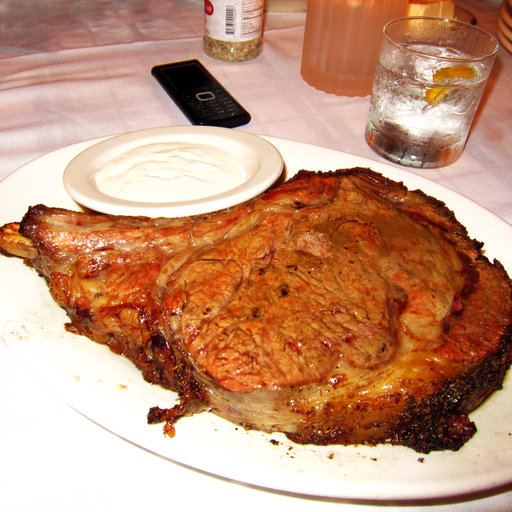

In [7]:
# Visualize an image
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

# Impor Pustaka:

Mengimpor pustaka `random` untuk menghasilkan bilangan acak.
Mengimpor class `Image` dari pustaka `PIL` (Python Imaging Library) untuk memanipulasi gambar.

## Penetapan Seed (opsional):

Komentar (hash `#`) pada baris `random.seed(42)` menandakan bahwa seed acak dapat diatur (opsional). Seed memastikan hasil yang dihasilkan secara acak dapat direproduksi.

## Dapatkan Semua Path Gambar:

Membuat daftar `image_path_list` yang berisi semua path gambar dengan ekstensi `.jpg` di dalam folder `image_path`. Pencarian dilakukan dengan menggunakan karakter wildcard `*` yang berarti "kombinasi apa pun".

## Dapatkan Path Gambar Secara Acak:

Memilih path gambar secara acak dari `image_path_list` menggunakan `random.choice()` dan menyimpannya dalam variabel `random_image_path`.

## Dapatkan Kelas Gambar dari Nama Path:

Mendapatkan kelas gambar dari nama direktori induk (`parent`) dari `random_image_path` menggunakan `stem()`.

## Buka Gambar:

Membuka gambar yang terpilih menggunakan `Image.open()` dan menyimpannya dalam variabel `img`.

## Cetak Metadata dan Tampilkan Gambar:

Mencetak metadata gambar seperti path, kelas, tinggi, dan lebar.
Menampilkan gambar tersebut.

Melalui kode ini, sebuah gambar dipilih secara acak dari dataset, dan informasi serta metadata tentang gambar tersebut dicetak dan ditampilkan. Ini memberikan wawasan tentang struktur dan karakteristik dataset gambar yang akan digunakan dalam tahap analisis atau pengolahan data selanjutnya.


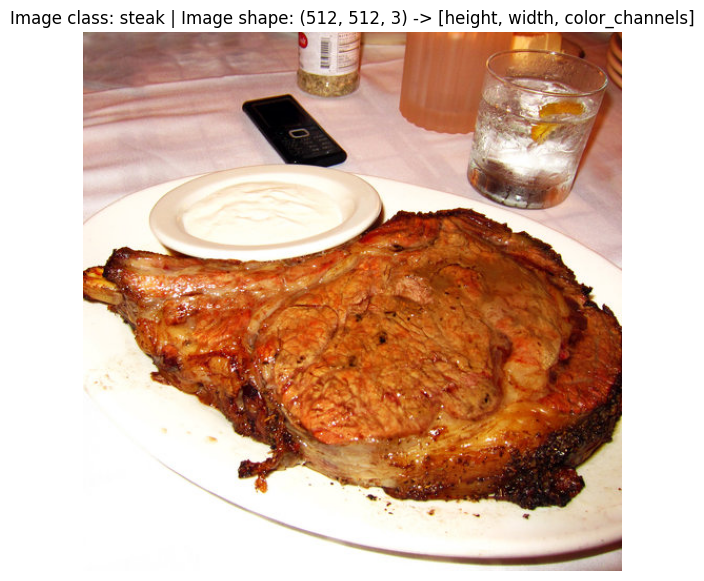

In [8]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [9]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
# Write transform for turning images into tensors
data_transform = transforms.Compose([
  # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
  transforms.Resize(size=(64, 64)),
  # Flip the images randomly on horizontal
  transforms.RandomHorizontalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor() # converts all pixel values from 0-255 to be between 0-1
])

In [11]:
random.sample(image_path_list, k=3)

[PosixPath('data/pizza_steak_sushi/train/pizza/1572608.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2813454.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/739735.jpg')]

# Visualisasi Gambar dengan Matplotlib:

Mengimpor library `numpy` sebagai `np` dan `matplotlib.pyplot` sebagai `plt` untuk visualisasi gambar.
Mengonversi gambar (`img`) menjadi array NumPy menggunakan `np.asarray()`.
Menampilkan gambar dengan `plt.imshow()` dan memberikan judul serta metadata menggunakan `plt.title()`.
Menonaktifkan sumbu menggunakan `plt.axis(False)`.

# Transformasi Data dengan torchvision.transforms:

Mengimpor library `torch` dan modul `transforms` dari `torchvision` untuk transformasi data.
Membuat transformasi data dengan `transforms.Compose()` yang mencakup:
- Resize gambar menjadi ukuran 64x64x3 (64 tinggi, 64 lebar, 3 saluran warna) menggunakan `transforms.Resize()`.
- Mengacak gambar secara horizontal dengan peluang 0.5 menggunakan `transforms.RandomHorizontalFlip()`.
- Mengonversi gambar menjadi `torch.Tensor` dengan `transforms.ToTensor()`.

# Menampilkan Sampel Acak dari Path Gambar:

Menggunakan fungsi `random.sample()` untuk mengambil sampel acak sejumlah 3 dari `image_path_list`.

Kode ini menyajikan visualisasi gambar menggunakan Matplotlib dan menunjukkan contoh transformasi data menggunakan `torchvision.transforms`. Visualisasi ini membantu untuk memahami representasi data dan transformasi yang akan diterapkan pada dataset gambar.


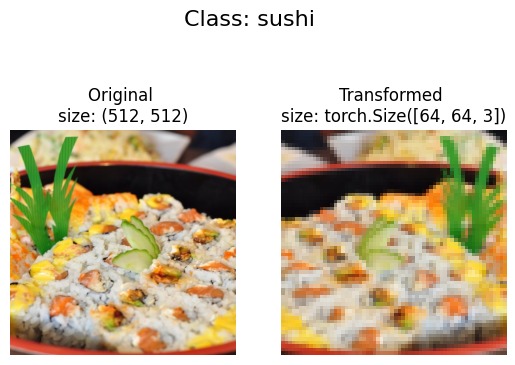

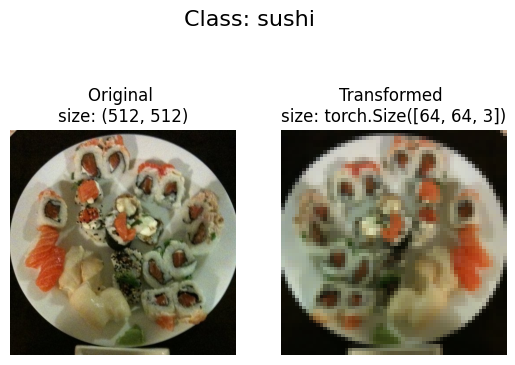

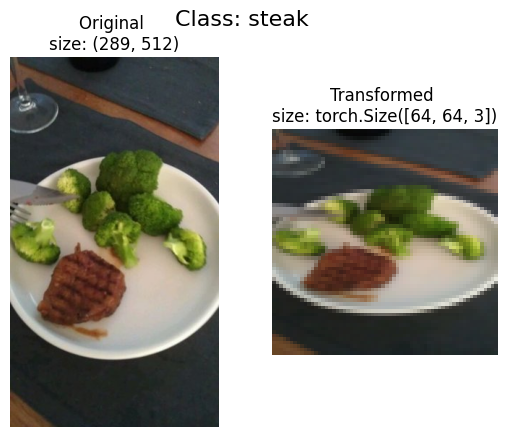

In [12]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Plots a series of random images from image_paths."""
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # permute() the image to make sure it's compatible with matplotlib
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [13]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
# Get class names as a list
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [15]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [17]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0881783250>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0881781930>)

In [18]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

In [19]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Fungsi plot_transformed_images:

- Membuat fungsi untuk memplot serangkaian gambar yang telah mengalami transformasi.
- Menggunakan `random.sample()` untuk memilih beberapa path gambar secara acak.
- Dengan `plt.subplots()`, membuat subplot dengan dua kolom: kolom pertama menampilkan gambar asli dan kolom kedua menampilkan gambar yang telah mengalami transformasi.
- Menerapkan transformasi ke gambar dan menggunakan `permute()` untuk memastikan kompatibilitas dengan matplotlib.
- Menampilkan judul dan metadata untuk gambar asli dan yang telah diubah.

# Membuat Dataset menggunakan ImageFolder:

- Menggunakan `datasets.ImageFolder` untuk membuat dataset latihan dan uji.
- Menentukan `root` sebagai direktori target gambar, `transform` sebagai transformasi yang akan diterapkan pada data gambar, dan `target_transform` sebagai transformasi yang akan diterapkan pada label (jika diperlukan).

# Mengambil Nama Kelas dan Panjang Dataset:

- Mengambil nama kelas sebagai list (`class_names`).
- Mendapatkan nama kelas sebagai dictionary (`class_dict`).
- Memeriksa panjang dataset latihan dan uji.

# DataLoader:

- Mengonversi dataset latihan dan uji menjadi DataLoader dengan `torch.utils.data.DataLoader`.
- Menentukan ukuran batch (`BATCH_SIZE`), jumlah pekerja (`num_workers`), dan pengaturan shuffle.

# Menampilkan Jumlah Batches:

- Menampilkan jumlah batch dalam DataLoader latihan dan uji.

# Mengambil Contoh Batch:

- Menggunakan `next(iter(train_dataloader))` untuk mengambil satu batch gambar dan label dari DataLoader latihan.
- Menampilkan bentuk (`shape`) dari gambar dan label.

Kode ini memfasilitasi pemahaman tentang transformasi data, pembuatan dataset, penggunaan DataLoader, dan informasi dataset yang digunakan dalam pembelajaran mesin.


3. **Recreate model_0 we built in section 7 of notebook 04.**



In [20]:
import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

In [21]:
import torch

# Tentukan perangkat yang akan digunakan (CPU atau GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [22]:
model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

# Implementasi Model TinyVGG

**Definisi Model TinyVGG:**

Model TinyVGG diimplementasikan sebagai subclass dari nn.Module, terinspirasi oleh arsitektur VGG (Visual Geometry Group).
Pada konstruktor (__init__), dua blok konvolusi (conv_block_1 dan conv_block_2) diikuti oleh lapisan klasifikasi (classifier) ditentukan. Setiap blok konvolusi terdiri dari dua lapisan konvolusi dengan aktivasi ReLU di antara keduanya, diikuti oleh lapisan penggabungan maksimum (MaxPool2d). Blok klasifikasi terdiri dari lapisan flatten dan lapisan linear yang menghubungkan output ke output akhir.
Metode forward mendefinisikan aliran maju (forward pass) melalui model, dimulai dari input melalui kedua blok konvolusi dan kemudian melalui blok klasifikasi.

**Inisialisasi Perangkat:**

Perangkat (device) diinisialisasi untuk menentukan apakah akan menggunakan GPU (cuda) jika tersedia atau CPU jika tidak.

**Pembuatan Model:**

Objek model (model_0) dibuat dengan menginstansiasi kelas TinyVGG dengan parameter input_shape=3 (jumlah saluran warna), hidden_units=10 (jumlah filter pada setiap lapisan konvolusi), dan output_shape=len(class_names) (jumlah kelas pada dataset).
Model dipindahkan ke perangkat yang telah ditentukan menggunakan metode .to(device).

**Hasil Output:**

Output model (model_0) ditampilkan.

Model ini dapat digunakan untuk klasifikasi gambar setelah dilatih dengan data yang sesuai. Namun, pada saat ini, model belum dilatih dan hanya ditunjukkan strukturnya. Training perlu dilakukan menggunakan data dan label yang relevan sebelum dapat digunakan untuk prediksi.


In [23]:
len(class_names)


3

In [24]:
16*16*10

2560

In [25]:
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[ 0.0348, -0.0382, -0.0545]], grad_fn=<AddmmBackward0>)

**4. Create training and testing functions for model_0.**

In [26]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [27]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [28]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

# Fungsi Pelatihan dan Evaluasi Model

### Fungsi train_step
Fungsi ini digunakan untuk melatih model dengan satu epoch. Langkah-langkahnya melibatkan:
1. Menempatkan model dalam mode pelatihan.
2. Mengatur nilai awal loss dan akurasi pelatihan.
3. Meloop melalui DataLoader dan batch data.
4. Mengirimkan data ke perangkat target (device).
5. Melakukan langkah-langkah pelatihan: forward pass, kalkulasi dan akumulasi loss, pengaturan gradient, backward pass, dan langkah optimizer.
6. Menghitung dan mengakumulasi akurasi.

### Fungsi test_step
Fungsi ini digunakan untuk mengevaluasi model pada dataset pengujian. Langkah-langkahnya melibatkan:
1. Menempatkan model dalam mode evaluasi.
2. Mengatur nilai awal loss dan akurasi pengujian.
3. Meloop melalui DataLoader dan batch data.
4. Mengirimkan data ke perangkat target (device).
5. Melakukan langkah-langkah evaluasi: forward pass, kalkulasi dan akumulasi loss, dan kalkulasi serta akumulasi akurasi.

### Fungsi train
Fungsi ini menyusun langkah-langkah pelatihan dan pengujian model untuk sejumlah epoch tertentu. Langkah-langkahnya melibatkan:
1. Membuat kamus hasil untuk menyimpan metrik pelatihan dan pengujian.
2. Meloop sebanyak epoch yang ditentukan.
3. Melakukan langkah pelatihan dan pengujian.
4. Memperbarui dan mencetak hasil setiap epoch.
5. Mengumpulkan metrik pelatihan dan pengujian ke dalam kamus hasil.
6. Mengembalikan kamus hasil sebagai keluaran fungsi.

Fungsi-fungsi ini membantu dalam pelatihan dan evaluasi model deep learning dengan memanfaatkan DataLoader, optimisasi gradient, dan fungsi loss yang telah ditentukan.


**5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?**

In [29]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2800 | test_loss: 1.0960 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1010 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3511 | test_loss: 1.1007 | test_acc: 0.3333


In [30]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2800 | test_loss: 1.0960 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1010 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3511 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3422 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 12 | train_l

In [31]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=50)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2800 | test_loss: 1.0960 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1010 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3511 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3422 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 12 | train_l

# Pelatihan Model pada Beberapa Epochs

### Model Pertama (model_0)
Model pertama (model_0) diinisialisasi dan dilatih untuk 5 epoch dengan menggunakan optimizer Adam dan fungsi loss CrossEntropyLoss. Langkah-langkahnya melibatkan:
1. Inisialisasi seed untuk mendapatkan hasil yang konsisten.
2. Membuat model TinyVGG dengan parameter tertentu.
3. Menggunakan fungsi train untuk melatih model selama 5 epoch.
4. Menyimpan hasil pelatihan dalam model_0_results.

### Model Kedua (model_1)
Model kedua (model_1) diinisialisasi dan dilatih untuk 20 epoch dengan langkah-langkah yang serupa dengan model pertama. Ini membantu melihat bagaimana performa model dapat meningkat dengan lebih banyak iterasi pelatihan.

### Model Ketiga (model_2)
Model ketiga (model_2) diinisialisasi dan dilatih untuk 50 epoch dengan langkah-langkah yang sama seperti model pertama dan kedua. Ini bertujuan untuk mengevaluasi model pada jumlah epoch yang lebih besar dan melihat apakah ada perbaikan lebih lanjut dalam performa.

Setiap iterasi melibatkan penyesuaian berulang model, evaluasi dengan dataset pelatihan dan pengujian, serta pencatatan hasil pelatihan. Pada akhirnya, hasil pelatihan dari setiap model disimpan dalam variabel model_0_results, model_1_results, dan model_2_results.


**6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?**

In [32]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0995 | train_acc: 0.3689 | test_loss: 1.0825 | test_acc: 0.3467
Epoch: 2 | train_loss: 1.0484 | train_acc: 0.4489 | test_loss: 1.0402 | test_acc: 0.4933
Epoch: 3 | train_loss: 0.9681 | train_acc: 0.5244 | test_loss: 0.9637 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.8791 | train_acc: 0.6178 | test_loss: 0.9756 | test_acc: 0.4800
Epoch: 5 | train_loss: 0.8781 | train_acc: 0.5956 | test_loss: 0.9887 | test_acc: 0.4267
Epoch: 6 | train_loss: 0.8468 | train_acc: 0.6356 | test_loss: 0.9767 | test_acc: 0.4800
Epoch: 7 | train_loss: 0.8403 | train_acc: 0.6400 | test_loss: 1.0069 | test_acc: 0.5067
Epoch: 8 | train_loss: 0.7671 | train_acc: 0.6578 | test_loss: 0.9913 | test_acc: 0.4933
Epoch: 9 | train_loss: 0.7312 | train_acc: 0.6889 | test_loss: 1.0127 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.7279 | train_acc: 0.6844 | test_loss: 1.0202 | test_acc: 0.4533
Epoch: 11 | train_loss: 0.7131 | train_acc: 0.6933 | test_loss: 1.0134 | test_acc: 0.5200
Epoch: 12 | train_l

# Peningkatan Jumlah Hidden Units pada Model (model_3)

### Langkah Penyempurnaan
Langkah ini melibatkan modifikasi model TinyVGG dengan menggandakan jumlah hidden units dari 10 menjadi 20. Selanjutnya, model ini dilatih selama 20 epoch untuk mengevaluasi pengaruh peningkatan jumlah unit terhadap performa model.

### Inisialisasi Model (model_3)
1. Seed diatur untuk hasil yang konsisten pada setiap eksekusi.
2. Model TinyVGG diinisialisasi dengan jumlah hidden units yang ditingkatkan menjadi 20.
3. Fungsi loss CrossEntropyLoss dan optimizer Adam diatur dengan parameter yang sesuai.

### Pelatihan Model
4. Menggunakan fungsi train untuk melatih model selama 20 epoch dengan dataset pelatihan dan pengujian.
5. Hasil pelatihan disimpan dalam variabel model_3_results.

### Tujuan
Langkah ini bertujuan untuk mengamati bagaimana peningkatan jumlah hidden units memengaruhi performa model, khususnya dalam hal kecepatan konvergensi dan akurasi. Evaluasi dilakukan pada dataset pengujian untuk memastikan generalisasi model yang lebih baik terhadap data yang tidak terlihat selama pelatihan.


**7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?**

In [33]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [34]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.


In [35]:
# Turn the data into datasets and dataloaders
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [36]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [37]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.3312 | test_loss: 1.1005 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0838 | train_acc: 0.3583 | test_loss: 1.0697 | test_acc: 0.3858
Epoch: 3 | train_loss: 1.0273 | train_acc: 0.4500 | test_loss: 0.9528 | test_acc: 0.5722
Epoch: 4 | train_loss: 0.9235 | train_acc: 0.5583 | test_loss: 0.9162 | test_acc: 0.5722
Epoch: 5 | train_loss: 0.8648 | train_acc: 0.6521 | test_loss: 0.9192 | test_acc: 0.5455
Epoch: 6 | train_loss: 0.8384 | train_acc: 0.6396 | test_loss: 1.0324 | test_acc: 0.4903
Epoch: 7 | train_loss: 0.9034 | train_acc: 0.5708 | test_loss: 0.8969 | test_acc: 0.4932
Epoch: 8 | train_loss: 0.7646 | train_acc: 0.6667 | test_loss: 0.9066 | test_acc: 0.5824
Epoch: 9 | train_loss: 0.7828 | train_acc: 0.6542 | test_loss: 0.9520 | test_acc: 0.5239
Epoch: 10 | train_loss: 0.8123 | train_acc: 0.6396 | test_loss: 0.9111 | test_acc: 0.5795
Epoch: 11 | train_loss: 0.7513 | train_acc: 0.6667 | test_loss: 0.8614 | test_acc: 0.6284
Epoch: 12 | train_l

# Pengunduhan dan Persiapan Data 20% untuk Pizza/Steak/Sushi

### Pengunduhan dan Ekstraksi Data
1. Mendownload dataset Pizza/Steak/Sushi sebesar 20% dari GitHub.
2. Mengecek apakah folder untuk data tersebut sudah ada, jika tidak, maka membuat folder tersebut.
3. Mengunduh zip file yang berisi gambar-gambar dan mengekstraknya ke folder yang telah disiapkan.

### Eksplorasi Jumlah Gambar
4. Menjelajahi jumlah direktori, subdirektori, dan gambar dalam folder yang telah diunduh menggunakan fungsi walk_through_dir.

### Pembuatan Dataset dan Dataloader
5. Menyusun dataset pelatihan (train_data_20_percent) dan dataset pengujian (test_data_20_percent) dari gambar-gambar yang telah diunduh.
6. Menerapkan transformasi sederhana seperti Resize dan ToTensor pada dataset.

### Penyesuaian Jumlah Data
7. Membuat dataloader untuk pelatihan (train_dataloader_20_percent) dan pengujian (test_dataloader_20_percent) dengan menggunakan DataLoader dari PyTorch.
8. Menyesuaikan jumlah data pelatihan dan pengujian menjadi 20% dari dataset penuh.

### Pelatihan Model dengan Jumlah Data yang Ditingkatkan
9. Inisialisasi model TinyVGG (model_4) dengan jumlah hidden units sebanyak 20.
10. Menentukan fungsi loss (CrossEntropyLoss) dan optimizer (Adam) dengan parameter yang sesuai.
11. Melatih model menggunakan dataset pelatihan yang telah ditingkatkan sebanyak 20% dan dataset pengujian yang telah disesuaikan.
12. Hasil pelatihan disimpan dalam variabel model_4_results.

### Tujuan
Langkah ini bertujuan untuk melihat bagaimana performa model berkembang ketika dilatih dengan jumlah data yang ditingkatkan sebanyak 20%. Evaluasi dilakukan pada dataset pengujian yang telah diubah untuk memastikan generalisasi model pada jumlah data yang lebih besar.


**8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.**

In [38]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [39]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img


tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

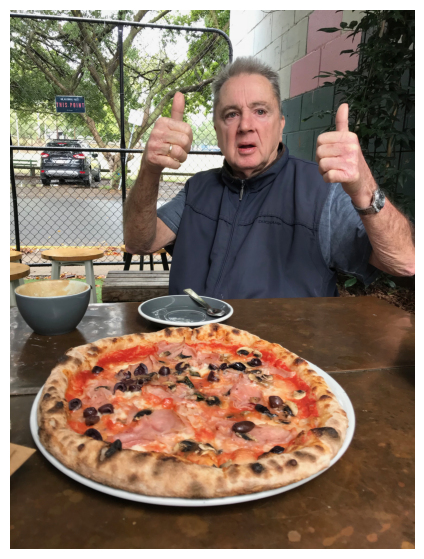

In [40]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


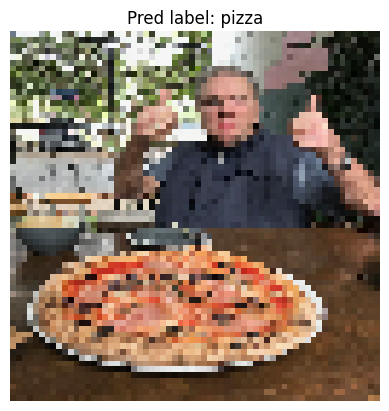

In [41]:

# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);

# Prediksi pada Gambar Kustom

### Mendapatkan Gambar Kustom
1. Mendownload gambar kustom dengan nama "pizza_dad.jpeg" dari GitHub.
2. Gambar tersebut diunduh dan disimpan ke dalam file "pizza_dad.jpeg".

### Memuat dan Menampilkan Gambar
3. Menggunakan torchvision untuk membaca dan memuat gambar "pizza_dad.jpeg".
4. Menampilkan gambar tersebut menggunakan matplotlib. Gambar diperoleh dalam format HWC (height, width, color_channels) yang sesuai dengan preferensi matplotlib.

### Melakukan Prediksi pada Gambar
5. Model TinyVGG yang telah dilatih sebelumnya (model_4) diubah ke mode evaluasi.
6. Dengan menggunakan konteks torch.inference_mode(), proses prediksi dilakukan pada gambar kustom.
7. Gambar diubah menjadi format yang dapat dioperasikan oleh model (float, rentang antara 0 dan 1, dan diubah ukurannya menjadi 64x64).
8. Gambar diubah menjadi batch tunggal dan dipindahkan ke perangkat yang sesuai.
9. Prediksi dilakukan pada gambar menggunakan model dan hasilnya disimpan dalam variabel y_pred_logit.

### Menampilkan Hasil Prediksi
10. Menampilkan gambar kustom dan hasil prediksi pada gambar tersebut.
11. Prediksi ditampilkan sebagai label kelas yang sesuai dengan kelas pada dataset (class_names).
12. Menampilkan gambar dan prediksi pada matplotlib plot.

### Tujuan
Langkah-langkah ini bertujuan untuk memberikan gambaran tentang cara menggunakan model yang telah dilatih sebelumnya untuk melakukan prediksi pada gambar yang tidak termasuk dalam dataset pelatihan atau pengujian. Proses ini membantu menguji kemampuan model untuk melakukan klasifikasi pada data yang belum pernah dilihat sebelumnya.
